In [67]:
#library
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD



#tkinter 
import os
import PIL
import cv2
import glob
import numpy as np
from tkinter import *
from tkinter import Canvas
from PIL import Image, ImageDraw, ImageGrab

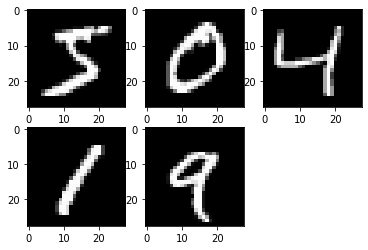

In [68]:
#mengambil dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

for i in range(5):
    plt.subplot(int('23' + str(i+1)))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

In [69]:
#gambar (dataset) direpresentasikan sebagai 
#matriks 28x28 yang berisi nilai piksel skala abu-abu. 
#Berdasarkan hal tersebut maka dimensi dari data latih 
#adalah (60000,28,28) tetapi model CNN akan membutuhkan 
#satu dimensi lagi sehingga perlu dilakukan pengolahan 
#data dengan membentuk kembali matriks menjadi bentuk 
#(60000,28,28,1)

In [70]:
#normalisasi dataset
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')

x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')

#konversi class vector ke binary class matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#normalisasi input
x_train = x_train/255
x_test = x_test/255

In [72]:
#membuat arsitektur CNN dan filter
def modelcnn():
    num_classes = 10
    model = Sequential()
    model.add(Convolution2D(32,kernel_size=(3,3),activation='relu'))
    model.add(Convolution2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

model = modelcnn()

In [74]:
#melatih model
model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10,batch_size=200,verbose=2)


Epoch 1/10
300/300 - 54s - loss: 0.2150 - accuracy: 0.9344 - val_loss: 0.0510 - val_accuracy: 0.9836
Epoch 2/10
300/300 - 52s - loss: 0.0669 - accuracy: 0.9797 - val_loss: 0.0383 - val_accuracy: 0.9876
Epoch 3/10
300/300 - 52s - loss: 0.0507 - accuracy: 0.9837 - val_loss: 0.0317 - val_accuracy: 0.9898
Epoch 4/10
300/300 - 55s - loss: 0.0390 - accuracy: 0.9883 - val_loss: 0.0325 - val_accuracy: 0.9893
Epoch 5/10
300/300 - 59s - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0291 - val_accuracy: 0.9904
Epoch 6/10
300/300 - 58s - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0253 - val_accuracy: 0.9918
Epoch 7/10
300/300 - 59s - loss: 0.0222 - accuracy: 0.9928 - val_loss: 0.0285 - val_accuracy: 0.9916
Epoch 8/10
300/300 - 59s - loss: 0.0207 - accuracy: 0.9930 - val_loss: 0.0281 - val_accuracy: 0.9911
Epoch 9/10
300/300 - 61s - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0247 - val_accuracy: 0.9929
Epoch 10/10
300/300 - 59s - loss: 0.0166 - accuracy: 0.9944 - val_loss: 0.0276 - val_accura

In [76]:
skor = model.evaluate(x_test,y_test, verbose=0)
print((100-skor[1]*100))

0.7399976253509521


In [75]:
model.save('mode.h1')

INFO:tensorflow:Assets written to: mode.h1\assets


In [77]:
#input model untuk tkitner
from keras.models import load_model
model = load_model('mode.h1')


In [78]:
#fungsi tkinter
def clear_digit():
        global cv
        cv.delete("all")
        
        return cv
    
def activate_event(event):
    global lastx, lasty
    cv.bind('<B1-Motion>',pena)
    lastx, lasty = event.x, event.y
    
def pena(event):
    global lastx,lasty
    x,y = event.x, event.y
    
    cv.create_line((lastx,lasty,x,y),width=8,fill='black',capstyle=ROUND,smooth=TRUE,splinesteps=12)
    
    lastx, lasty= x,y

def recognize_digit():
    global image_number
    
    prediksi = []
    persen = []
    image_number = 0
    
    filename = f'image_{image_number}.png'
    widget = cv
    
    #widget coordinate
    x = window.winfo_rootx() + widget.winfo_x()
    y = window.winfo_rooty() + widget.winfo_y()
    
    xl = x + widget.winfo_width()
    yl = y + widget.winfo_height()
    
    #mengambil gambar
    ImageGrab.grab().crop((x,y,xl,yl)).save(filename)
    
    #membaca format warna data
    image = cv2.imread(filename,cv2.IMREAD_COLOR)
    
    #konversi ke grayscale
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    ret,th = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    
    contours = cv2.findContours(th,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[0]
    
    for cnt in contours:
        #bounding box
        x,y,w,h = cv2.boundingRect(cnt)
        
        #membuat kotak
        cv2.rectangle(image,(x,y),(x+w,y+h), (255,0,0), 1)
        top = int(0.05 * th.shape[0])
        bottom = top
        
        left = int(0.05 * th.shape[1])
        right = left
        
        th_up = cv2.copyMakeBorder(th,top,bottom,left,right, cv2.BORDER_REPLICATE)
        
        #ekstrak gambar
        roi = th[y-top:y+h+bottom, x-left:x+w+right]
        
        #ekstra gambar ke 28x28 pixels
        img = cv2.resize(roi,(28,28),interpolation=cv2.INTER_AREA)
        
        #reshaping
        img = img.reshape(1,28,28,1)
        
        #normalisasi gambar
        img = img / 255.0
        
        #prediksi gambar
        pred = model.predict([img])[0]
        
        
        
        #cetak hasil
        final_pred = np.argmax(pred)
        data = str(final_pred) + ' ' + str(int(max(pred)*100)) + '%'
        
        
        #properti binding box
        font = cv2.FONT_HERSHEY_SIMPLEX
        fontscale = 0.5
        color = (255,0,0)
        thickness = 1
        cv2.putText(image,data,(x,y-5),font,fontscale,color,thickness)
        
        
        #tampilkan binding bix
        cv2.imshow('image',image)
        cv2.waitKey(0)

In [79]:
#jendela
window = Tk()
window.resizable(0,0)
window.title('test')


#inisisialisasi variabel
lastx, lasty = None, None
image_number = 0

#create canvas
cv = Canvas(window, width=640, height=480, bg='white')
cv.grid(row=0,column=0,pady=2,sticky=W,columnspan=2)

cv.bind('<Button-1>',activate_event)


btn_save = Button(text="klasifikasikan",command = recognize_digit)
btn_save.grid(row=2,column=0,pady=1,padx=1)

btn_clear = Button(text="hapus canvas", command = clear_digit)
btn_clear.grid(row=5,column=1,pady=1,padx=1)

#run tkinter
window.mainloop()